# Executive Summary

Twitter is an important social medium for sharing thoughts. President trump tweets are an important source for to know what is he thinking, doing or thinking of doing. They are also a source of conflict and controversry. His tweets drigger news article discussions and make headlines. He following is at 55M on twitter which keeps his popularity among his supporters and opponents. His tweets are equally positive and negative(read: sarcastic/attacking) and equally liked because he is a controversial personality and no matter what he says, because he is President of United States of America he will be followed and retweeted. 

Given his tweets, I will be doing an analysis on how often does he tweets, how he tweets and will try to formulate a response based on his tweets. I will also be attempting to predict likes based on the words and sentiment attached to his tweets.

ASSUMPTIONS:
 * Tweets have only been taken into account from the day he was elected as the president
 * The distribution of the likes from the tweets will fulfill the assumptions of Linear Regression
      ** Linear relationship
      ** Multivariate normality
      ** No or little multicollinearity
      ** No auto-correlation
      ** Homoscedasticity

I have done an initial EDA on his tweets. The findings are as follows:
 * Trump tweets show a trend of increase of number of times he is tweeting per day. Which is at the rate of 6 times in 2017, 9 times in 2018 and around 12 times in 2019, which rate is double the number of tweets he was doing in one day back in 2017, his first presidency year.
 * He is more frequently tweeting between 10:00 am till 10:00. His tweets are coming the rest of the time as well, but not as much as the peak time tweets.
 * The total number of like that he has racked from the day he was elected as a president till Aug 2019 is, 732,947,115. (read: seven thirty two million, if we accumulate the likes before the time he became president, it will be over 1 billion)
 * The total number of retweets for the same time period are 171,431,537, more than four times less than the number of likes for the same period.
 * The Target Variable, favourite_count(number of likes for tweets) is highly negatively skewed (right tailed). 
 * The mean likes per tweet is 88,522.
 
Data Wrangling - Cleaning 
* The project required significant amount of cleaning, from removing links, other use names,special characters,other language tweets etc. RegEx was very useful for cleaning tasks. 

Modelling - Predicting Likes
* I used two bag of word models, i.e. CountVectorizer and TfidfVectorizer. The top tweeted tweet of his presidency is actually not even a word based tweet. It is a video. Following ten words were most commonly used in his tweets that got most of the likes.

    rocky, fat, merry, country, morning, threaten united, total exoneration, cool.
* For predicting the likes, i have used, regression, which gave me score of  r-square -3.16. The mean for the prediction was 89,799. 
* I got improved score with regularization, i.e. 0.12
* Also, i used stemming with nltk, which marginally improved the score to 0.135

* I also performed Sentiment Analysis on his tweets, which did not give any significant findings with how the likes were linked with his positive or negative tweets. Apparently, the longer his tweets were, the more sentiment(positive or negative) they will have. Shorter tweets were more of announcement or neutral tweets.

In [21]:
732947115 - 171431537

561515578

In [22]:
171431537*4

685726148

In [23]:
import pandas as pd
import numpy as np
import re



from datetime import datetime
from datetime import timedelta

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from nltk.stem import PorterStemmer
from sklearn.linear_model import Lasso, LassoCV
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.neural_network import MLPRegressor
from sklearn import metrics


from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error


import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [24]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /Users/fatima/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [25]:
# reading the data from CSV
df = pd.read_csv('donaldtrumptweets.csv') 

# Shape of the Dataframe - from the day he became president till August 2019

In [26]:
df.shape # taken the tweets 

(10318, 1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10318 entries, 0 to 10317
Data columns (total 1 columns):
source,text,created_at,retweet_count,favorite_count,is_retweet,id_str    10318 non-null object
dtypes: object(1)
memory usage: 80.7+ KB


In [28]:
df.columns

Index(['source,text,created_at,retweet_count,favorite_count,is_retweet,id_str'], dtype='object')

In [29]:
df.dtypes

source,text,created_at,retweet_count,favorite_count,is_retweet,id_str    object
dtype: object

In [30]:
df.iloc[0, 0]

'Twitter for iPhone,The Great State of North Carolina has EARLY VOTING for a very important Congressional (Ninth) race. Please vote early (now) or on Election Day September 10th for Dan Bishop a great guy. His opponent wants Open Borders Sanctuary Cities &amp; is weak on Crime Military &amp; Vets!,08-30-2019 21:39:54,19127,60738,false,1167552549974675458'

In [31]:
df['source'], df['tweet'],df['created_at'], df['retweet_count'],df['favourite_count'],df['is_retweet'],df['id_str'] = df['source,text,created_at,retweet_count,favorite_count,is_retweet,id_str'].str.split(',').str
df.head(2)

,"source,text,created_at,retweet_count,favorite_count,is_retweet,id_str",source,tweet,created_at,retweet_count,favourite_count,is_retweet,id_str
0,"Twitter for iPhone,The Great State of North Ca...",Twitter for iPhone,The Great State of North Carolina has EARLY VO...,08-30-2019 21:39:54,19127,60738,false,1167552549974675458
1,"Twitter for iPhone,https://t.co/ufd7tsGyAx,08-...",Twitter for iPhone,https://t.co/ufd7tsGyAx,08-30-2019 20:00:31,9987,39490,false,1167527540518522883


In [32]:
df = df.drop('source,text,created_at,retweet_count,favorite_count,is_retweet,id_str', axis = 1)

In [33]:
df.head(2)

,source,tweet,created_at,retweet_count,favourite_count,is_retweet,id_str
0,Twitter for iPhone,The Great State of North Carolina has EARLY VO...,08-30-2019 21:39:54,19127,60738,false,1167552549974675458
1,Twitter for iPhone,https://t.co/ufd7tsGyAx,08-30-2019 20:00:31,9987,39490,false,1167527540518522883


# Data Types for all columns

In [34]:
df.dtypes

source             object
tweet              object
created_at         object
retweet_count      object
favourite_count    object
is_retweet         object
id_str             object
dtype: object

# Changing the data type for favourite_count

In [35]:
df['favourite_count'] = df.favourite_count.astype(int)

In [36]:
# getting the null values
df.isnull().sum()

source             0
tweet              0
created_at         0
retweet_count      0
favourite_count    0
is_retweet         0
id_str             0
dtype: int64

In [37]:
# Getting the source of the tweets
df_source=pd.DataFrame(df.source.value_counts())


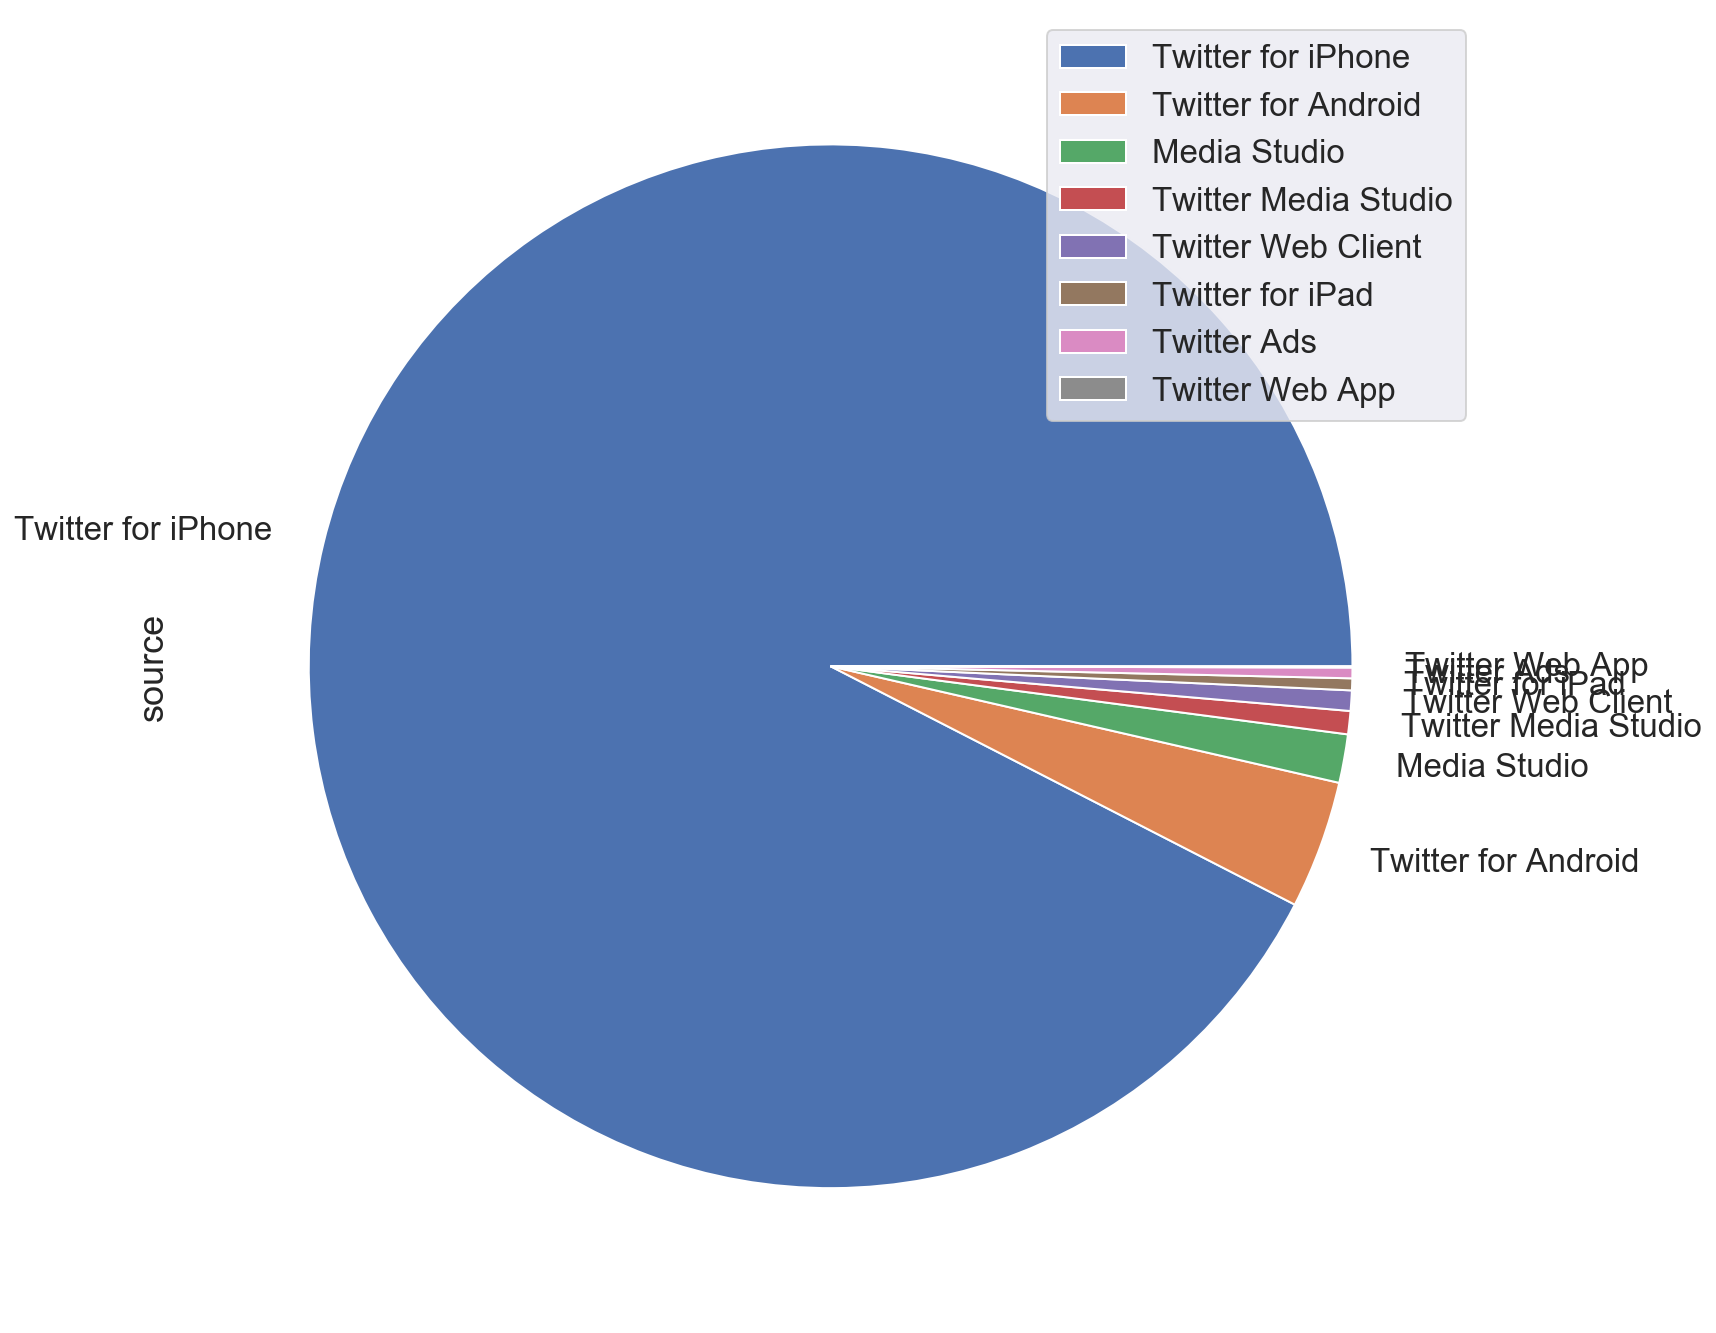

In [38]:
df_source.plot.pie('source', figsize = (20,12));

In [39]:
# getting the favourites grouped by the device
df_source_fav=df.groupby('source')[['favourite_count']].sum()
#df_source_fav.plot.pie('favourite_count', figsize = (20,12));

In [40]:
# Trump was not using iphone and used android for the few intial days in the end of 2016 and start of 2017 
# from march 2017 onwards trump started to use iphone

In [41]:
# creating the date, time, day and year from the time column

df['date'] = pd.to_datetime(df['created_at']).dt.date
df['time'] = pd.to_datetime(df['created_at']).dt.time
df['day'] = pd.to_datetime(df['created_at']).dt.day
df['year'] = pd.to_datetime(df['created_at']).dt.year

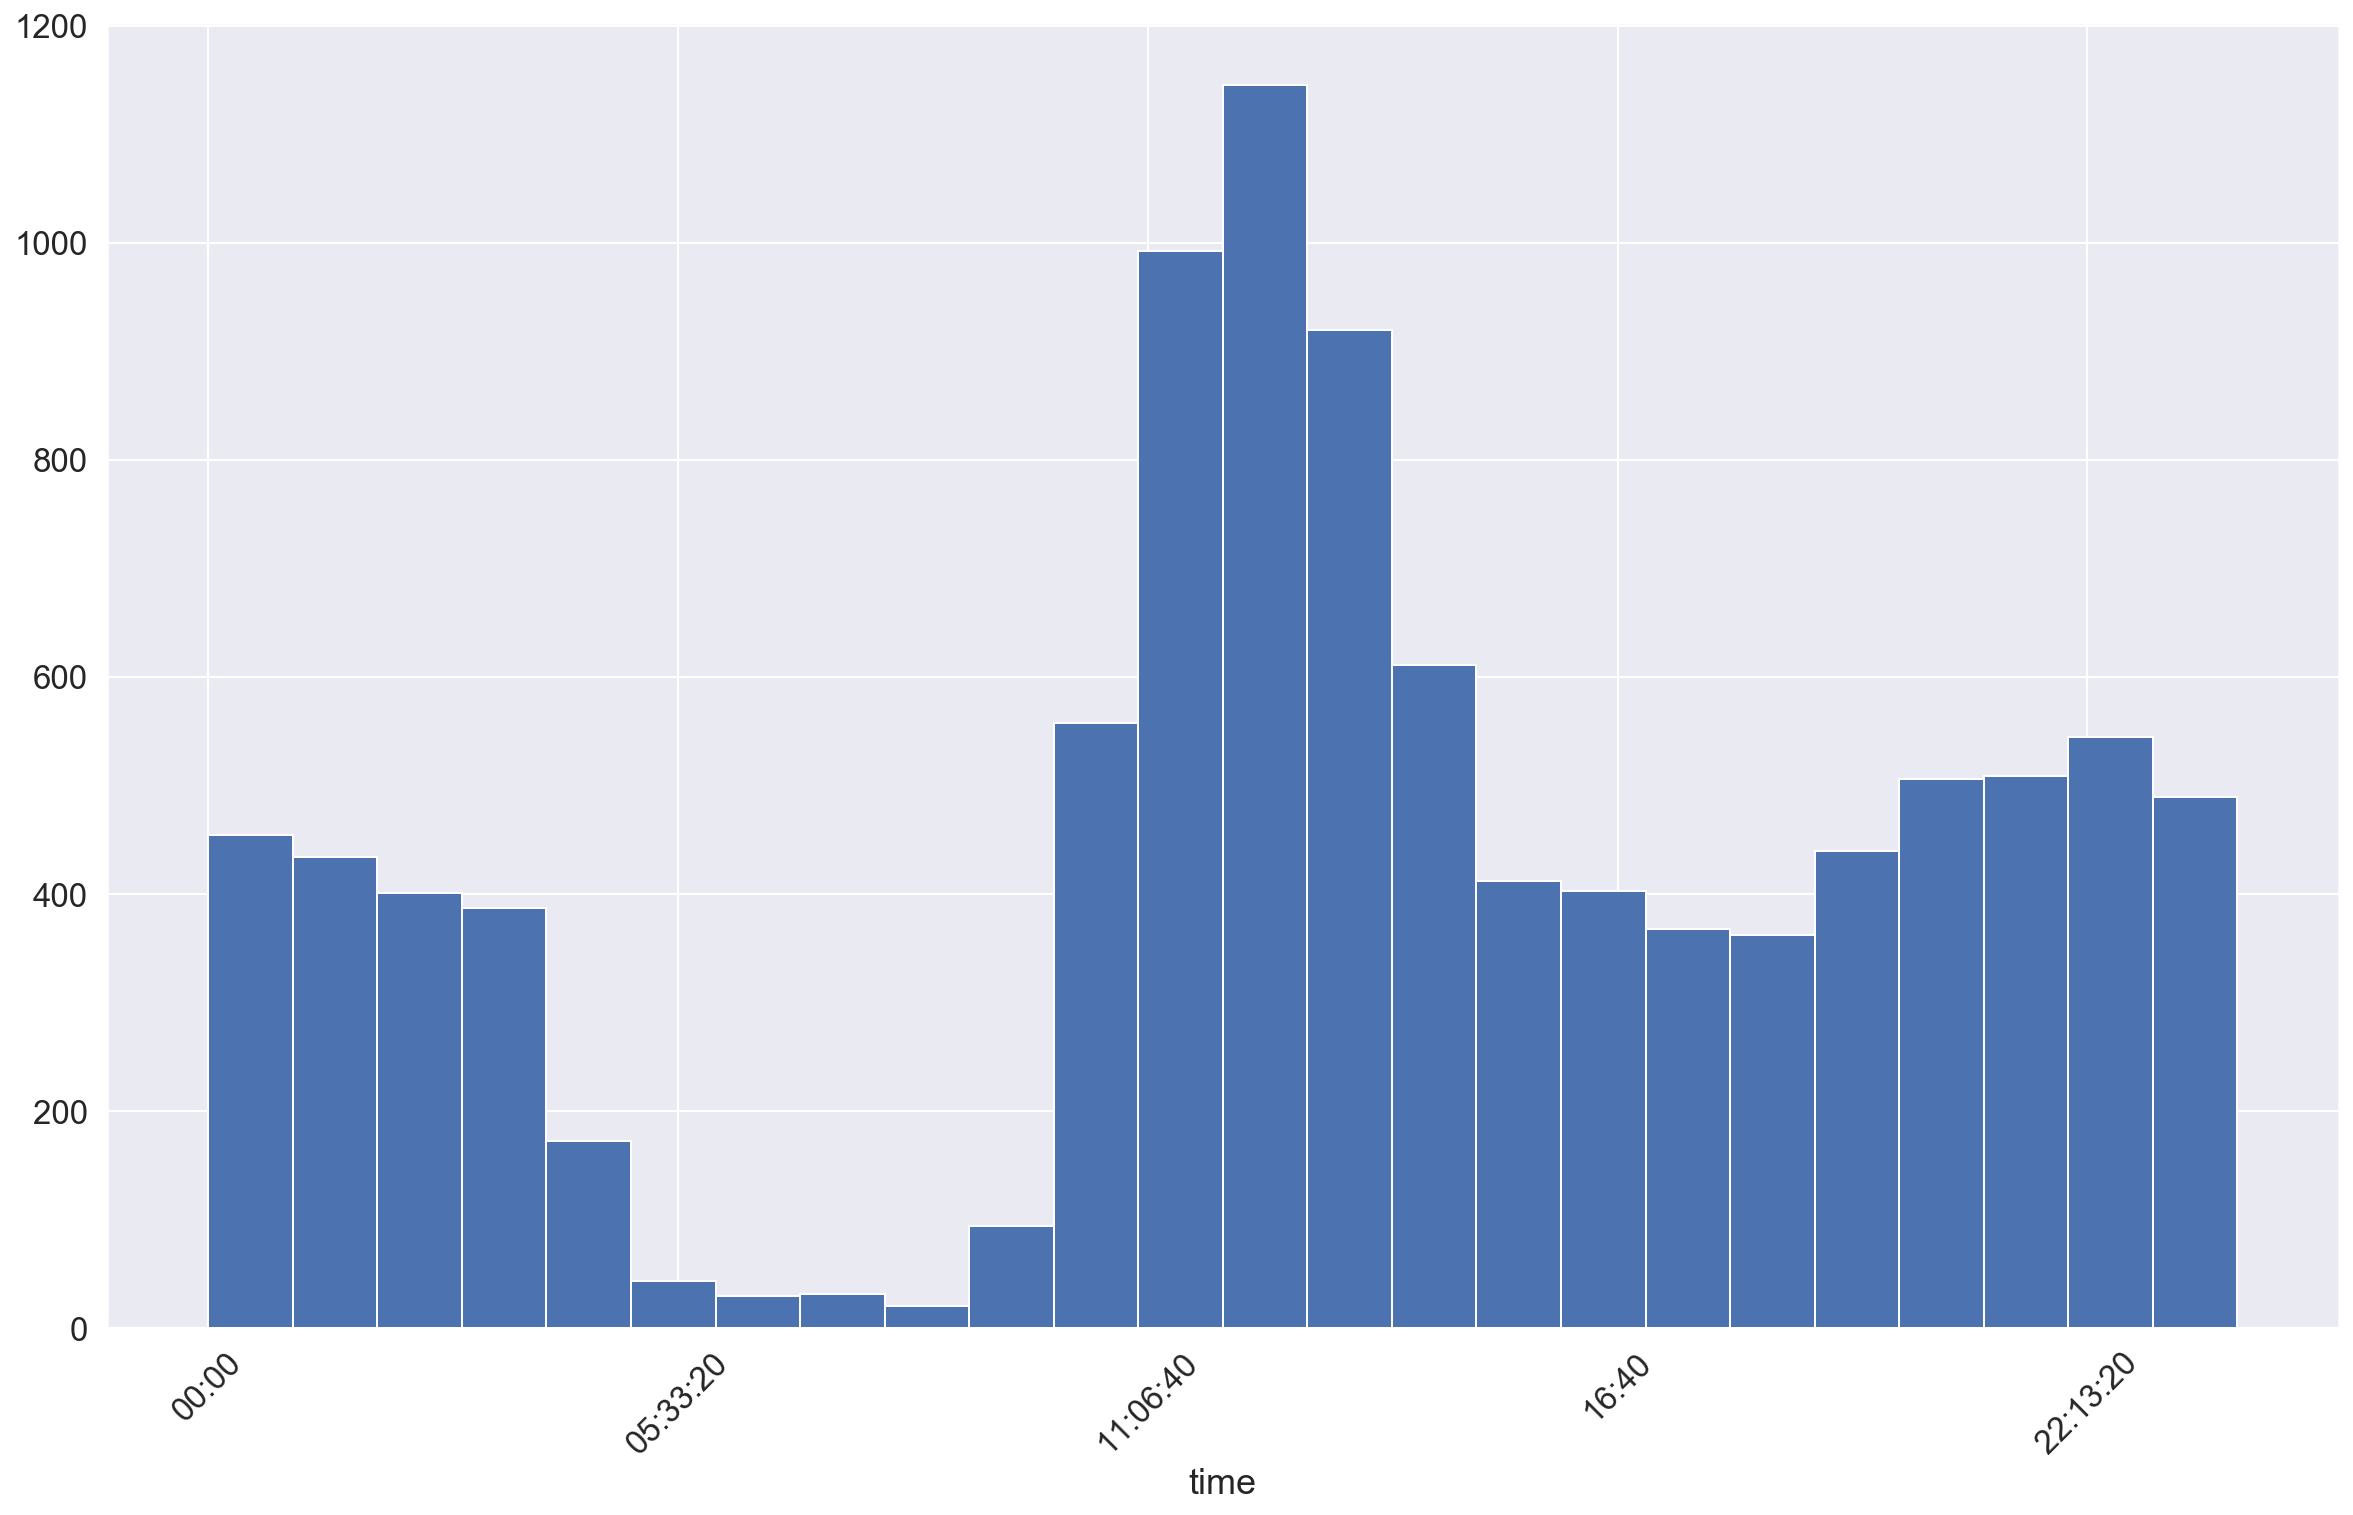

In [42]:
df.time.hist(figsize = (20,12), xrot = 45, bins = 24);

In [43]:
df.favourite_count.describe()

count     10318.000000
mean      71692.675422
std       52008.650016
min           0.000000
25%       42818.500000
50%       73285.500000
75%      100253.500000
max      879647.000000
Name: favourite_count, dtype: float64

In [44]:
#df.time.plot(kind = 'bar')

In [45]:
df.dtypes

source             object
tweet              object
created_at         object
retweet_count      object
favourite_count     int64
is_retweet         object
id_str             object
date               object
time               object
day                 int64
year                int64
dtype: object

In [46]:
df[['date']] = df[['date']].apply(pd.to_datetime)

In [47]:
#df['time'] = df['time'].apply(pd.to_datetime)
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

In [48]:
#df['day'] = pd.to_datetime(df['day'])

In [49]:
#df['year'] = pd.to_datetime(df['year'])
df['created_at'] = pd.to_datetime(df['created_at'])

In [50]:
df['weekday'] = df['created_at'].dt.dayofweek

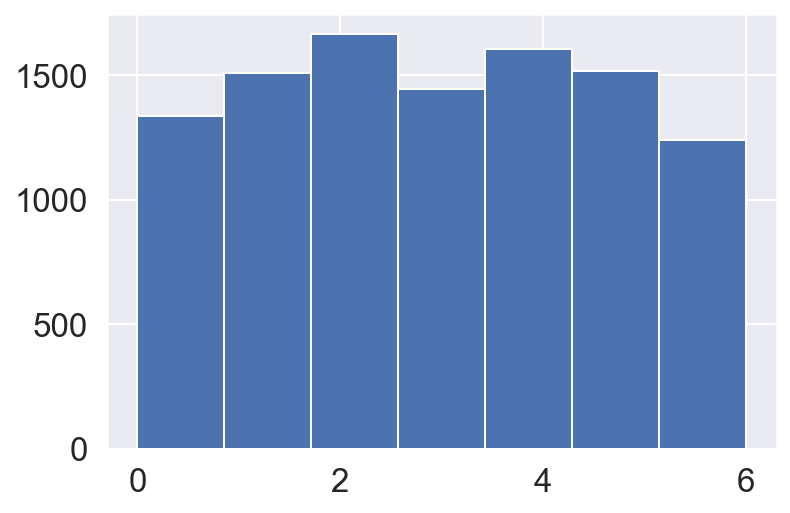

In [51]:
df.weekday.hist(bins = 7);

In [52]:
def day_of_week(date):
    days_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
                    3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    return days_of_week[date]

In [53]:
df['weekday_txt']= df.weekday.apply(day_of_week)

In [54]:
df.groupby('weekday_txt')[['favourite_count']].count().sort_values(by = 'favourite_count',ascending = False)

,favourite_count
weekday_txt,
Wednesday,1664
Friday,1604
Saturday,1516
Tuesday,1510
Thursday,1446
Monday,1337
Sunday,1241


In [55]:
df.weekday_txt.sort_values(ascending = False).head()#.hist(xrot = 90);


1352    Wednesday
8109    Wednesday
4767    Wednesday
4766    Wednesday
4765    Wednesday
Name: weekday_txt, dtype: object

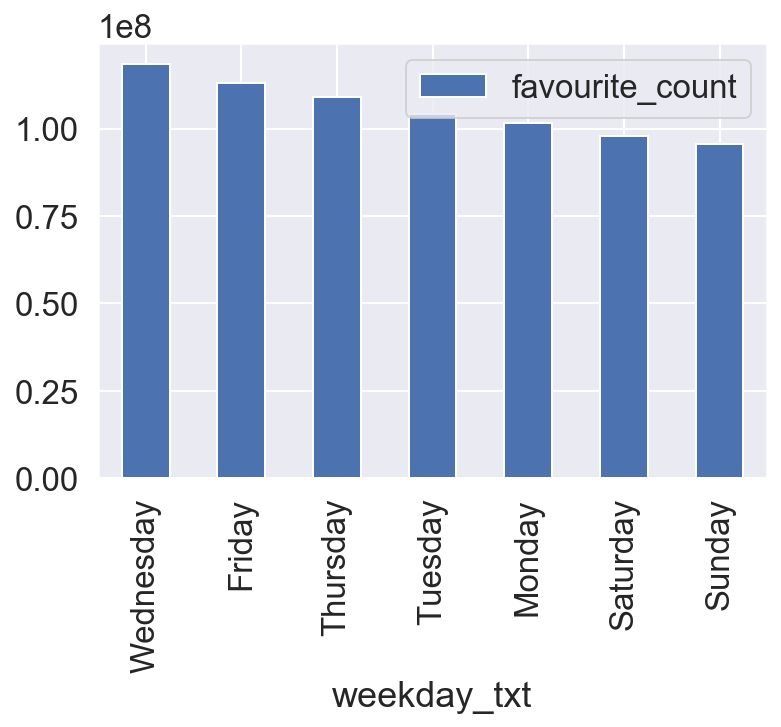

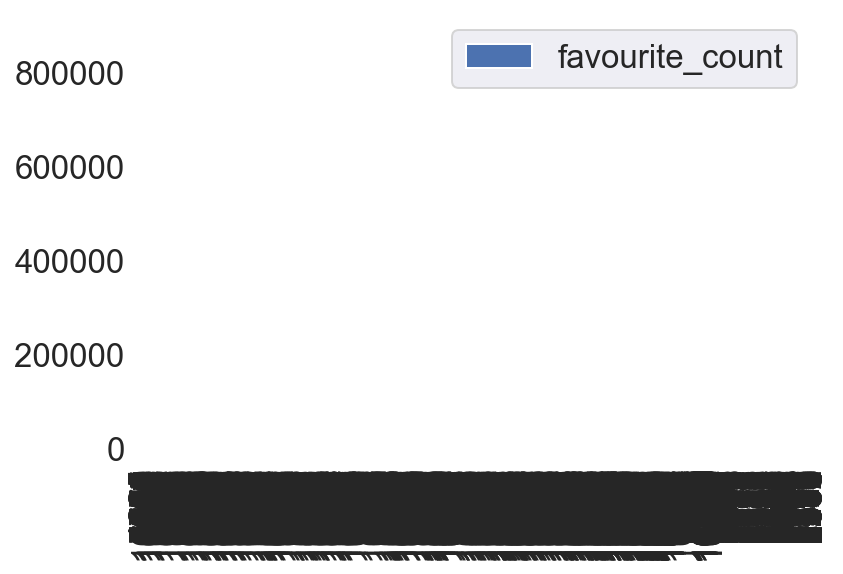

In [56]:
df.groupby('weekday_txt')[['favourite_count']].sum().sort_values(by = 'favourite_count',ascending = False).plot(kind = 'bar');#.hist(xrot = 90);
df[['weekday_txt', 'favourite_count']].sort_values(by = 'favourite_count',ascending = False).plot(kind = 'bar');
#plt.yscale('log')

In [57]:
#def get_month(x):
#    month = ''
#    month = x.split('-', 2)
#    return month[0]



#df['month']= df.created_at.map(get_month)

In [58]:
mask = (df['is_retweet'] == '')
df[mask]['tweet'].head()

7461    Thanks to all of the Republican and Democratic...
7462    It was my great honor to sign H.R. 267 the “Ma...
7463    On behalf of the American people THANK YOU to ...
7464    We are fighting for our farmers for our countr...
7465    In every decision we make we are honoring Amer...
Name: tweet, dtype: object

In [59]:
df.shape

(10318, 13)

In [60]:
df.head(10)

,source,tweet,created_at,retweet_count,favourite_count,is_retweet,id_str,date,time,day,year,weekday,weekday_txt
0,Twitter for iPhone,The Great State of North Carolina has EARLY VO...,2019-08-30 21:39:54,19127,60738,false,1167552549974675458,2019-08-30,1900-01-01 21:39:54,30,2019,4,Friday
1,Twitter for iPhone,https://t.co/ufd7tsGyAx,2019-08-30 20:00:31,9987,39490,false,1167527540518522883,2019-08-30,1900-01-01 20:00:31,30,2019,4,Friday
2,Twitter Media Studio,This should NEVER happen to another President ...,2019-08-30 19:12:50,18446,64046,false,1167515540199530499,2019-08-30,1900-01-01 19:12:50,30,2019,4,Friday
3,Twitter Media Studio,"""FALLOUT FROM IG'S SCATHING COMEY REPORT"" http...",2019-08-30 18:57:59,10543,35113,false,1167511801984114691,2019-08-30,1900-01-01 18:57:59,30,2019,4,Friday
4,Twitter Media Studio,“One of the most disgraceful examples of an ab...,2019-08-30 18:53:51,17935,53636,false,1167510759724765186,2019-08-30,1900-01-01 18:53:51,30,2019,4,Friday
5,Twitter Media Studio,Thanks @RepDougCollins - TRUE! https://t.co/o4...,2019-08-30 18:05:03,9518,34458,false,1167498482581680128,2019-08-30,1900-01-01 18:05:03,30,2019,4,Friday
6,Twitter for iPhone,The United States of America was not involved ...,2019-08-30 17:44:45,17704,61464,false,1167493371973255170,2019-08-30,1900-01-01 17:44:45,30,2019,4,Friday
7,Twitter for iPhone,RT @fema: Prepare today and stay informed as #...,2019-08-30 16:30:02,4161,0,true,1167474568325488641,2019-08-30,1900-01-01 16:30:02,30,2019,4,Friday
8,Twitter for iPhone,RT @NOAASatellites: Watch as the eye of #Hurri...,2019-08-30 16:29:47,6444,0,true,1167474506673348609,2019-08-30,1900-01-01 16:29:47,30,2019,4,Friday
9,Twitter for iPhone,If the Fed would cut we would have one of the ...,2019-08-30 14:10:13,14180,58890,false,1167439383932391425,2019-08-30,1900-01-01 14:10:13,30,2019,4,Friday


In [61]:
df_year=df.groupby('year')[['tweet']].count()

In [62]:
df_year

,tweet
year,
2016,197
2017,2602
2018,3568
2019,3951


In [63]:
df_year.tweet.values[1]/365

7.1287671232876715

In [64]:
df_year.tweet.values[2]/365

9.775342465753425

In [65]:
df_year.tweet.values[3]/240

16.4625

In [66]:
#df.groupby('month')[['tweet']].count()

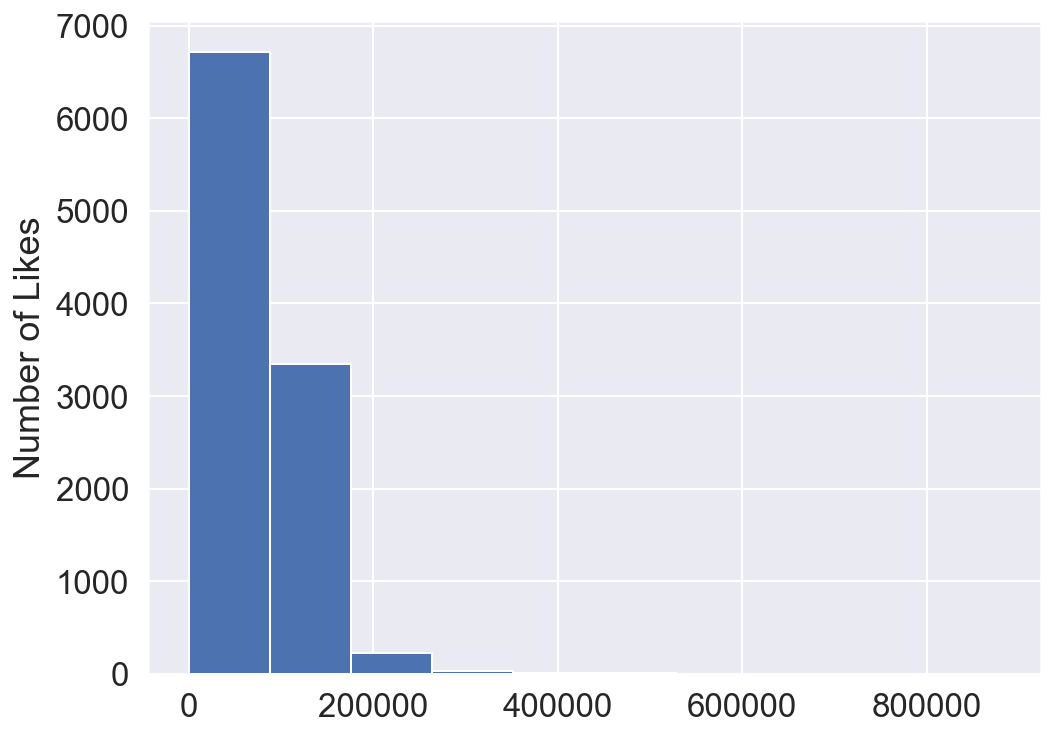

In [67]:

df.favourite_count.hist(figsize = (8,6))
plt.ylabel('Number of Likes')
plt.xlabel('');

In [68]:
#df.favourite_count.plot(kind='hist', bins=10, figsize = (12,8));

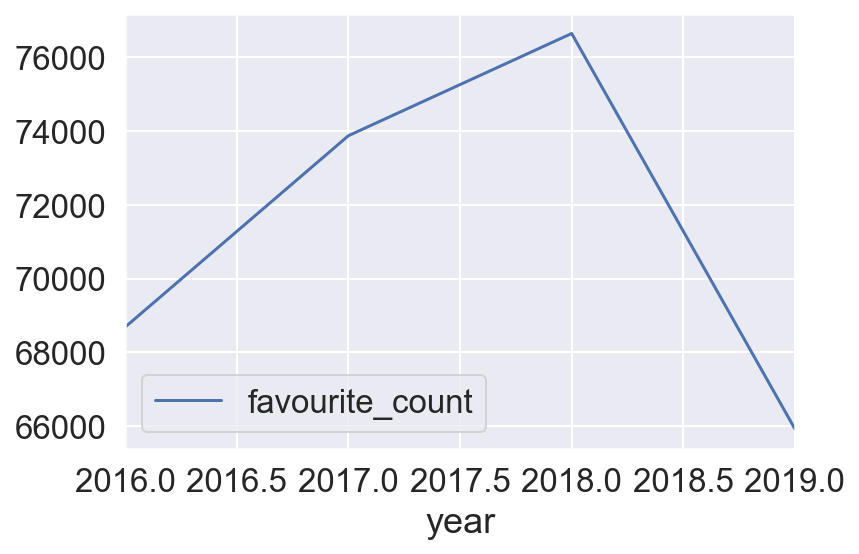

In [69]:
df.groupby('year')[['favourite_count']].mean().plot();

# Only considering the Trump's Very Own Tweets - Dataframe changed

In [70]:
df = df[df.is_retweet == 'false']

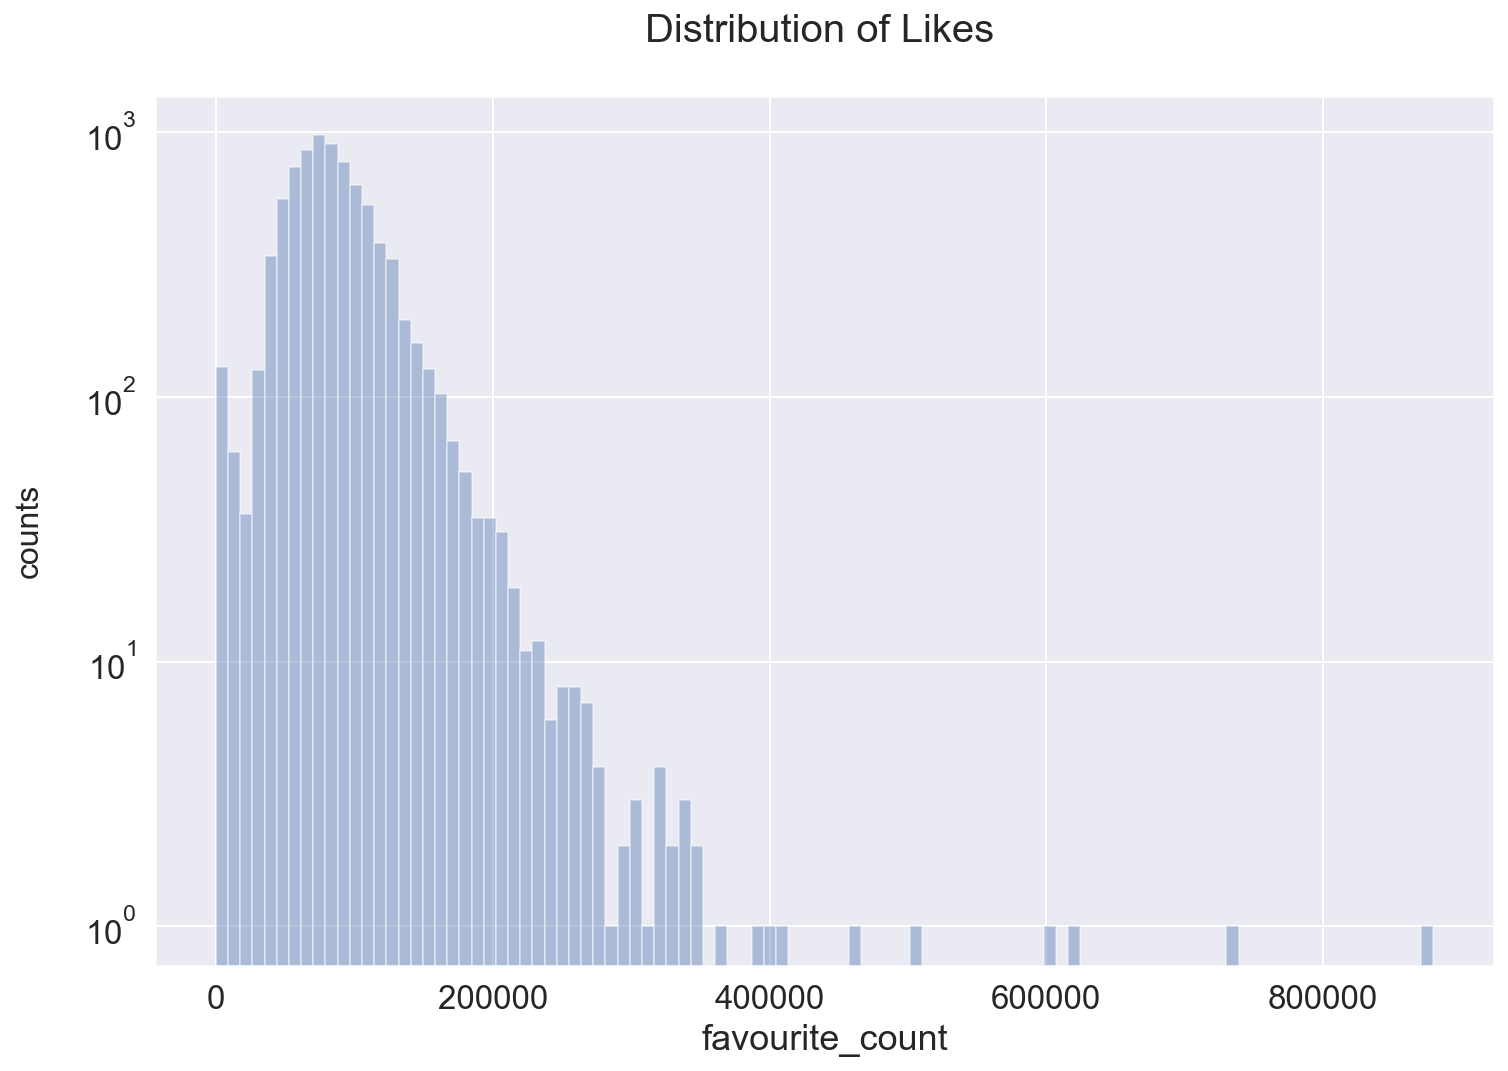

In [71]:
# Plotting the distrubution of likes after getting rid of the retweets

fig, ax = plt.subplots(figsize=(12, 8))

sns.distplot(df.favourite_count, bins=100, kde=False)
ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Distribution of Likes \n', fontsize=20)
ax.set_yscale('log')
plt.show()

In [72]:
df.favourite_count.value_counts()

83507     3
69609     3
100528    3
121937    2
96062     2
72482     2
91081     2
84191     2
37898     2
72783     2
82480     2
64500     2
93291     2
73335     2
99677     2
64283     2
110890    2
75392     2
96428     2
76326     2
107414    2
73244     2
67815     2
79007     2
76357     2
64826     2
45347     2
60703     2
72214     2
82234     2
         ..
59948     1
72674     1
96810     1
36249     1
46187     1
53783     1
74265     1
127515    1
84508     1
541       1
88606     1
64034     1
127523    1
199204    1
72230     1
55854     1
88831     1
72867     1
78387     1
84532     1
115253    1
188422    1
37439     1
59968     1
111171    1
67034     1
1889      1
29500     1
100341    1
0         1
Name: favourite_count, Length: 8012, dtype: int64

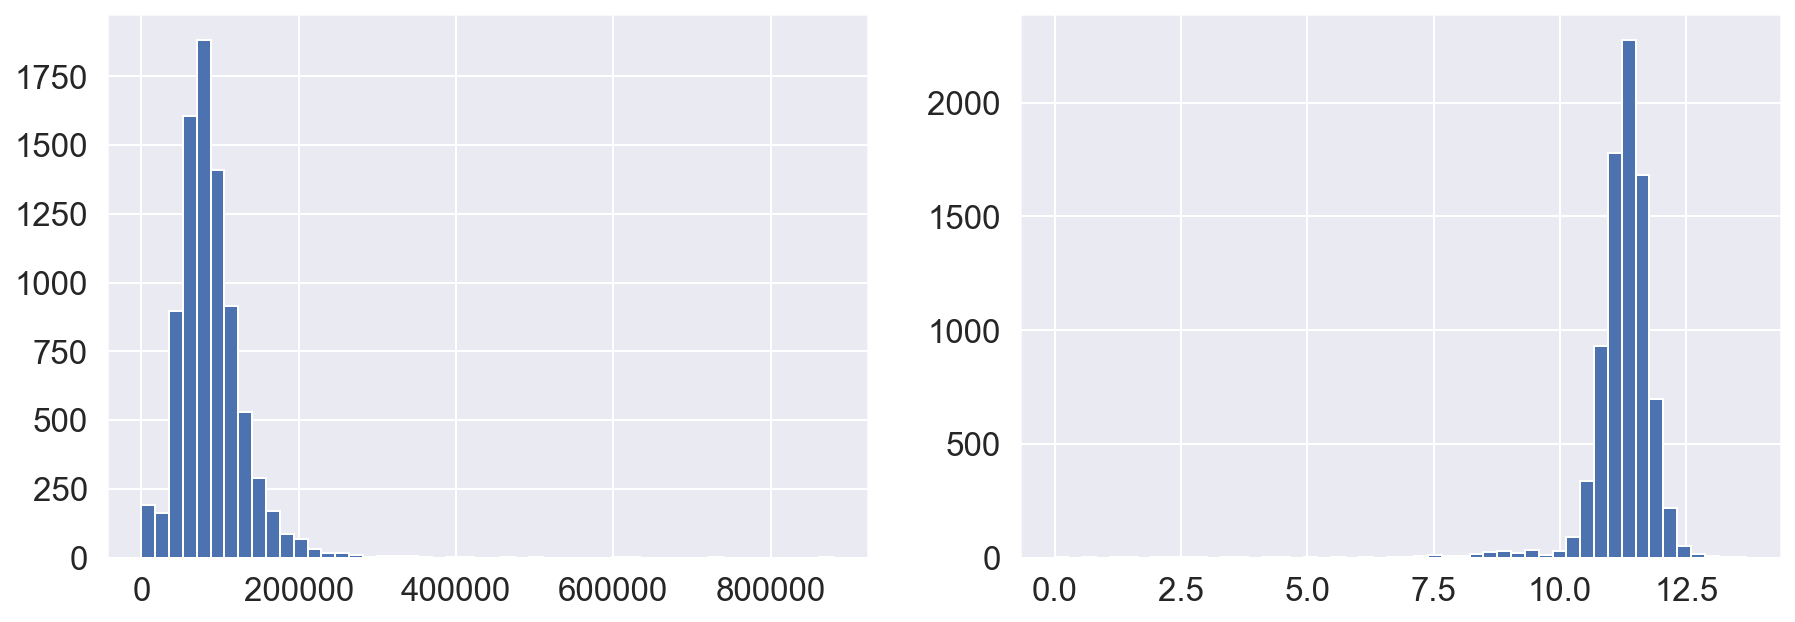

In [73]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
df.favourite_count.hist(ax=ax[0], bins=50)
np.log(df['favourite_count'][df.favourite_count !=0]).hist(ax=ax[1], bins=50);


In [74]:
df[['tweet', 'favourite_count']].sort_values(by = 'favourite_count',ascending = False)[:100]

,tweet,favourite_count
600,A$AP Rocky released from prison and on his way...,879647
892,Just spoke to @KanyeWest about his friend A$AP...,734567
7868,Why would Kim Jong-un insult me by calling me ...,616217
9074,#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg,605098
3994,Merry Christmas!,508327
3000,Good Morning Have A Great Day!,462655
2998,No Collusion No Obstruction Complete and Total...,409356
2701,https://t.co/222atp7wuB,398708
9960,Peaceful protests are a hallmark of our democr...,390826
6748,Thank you Kanye very cool! https://t.co/vRIC87...,362139


In [75]:
# Review data to verify initial assumptions


#Clean and munge data as necessary

In [76]:
# looking at the sources again, most of the retweets were from iphone

In [77]:
df.source.value_counts()

Twitter for iPhone      7533
Twitter for Android      409
Media Studio             155
Twitter Media Studio      74
Twitter Web Client        61
Twitter for iPad          35
Twitter Ads               34
Twitter Web App            4
Name: source, dtype: int64

In [78]:
# count of the tweets posted per source
df.groupby('source')['favourite_count'].mean()

source
Media Studio            68699.819355
Twitter Ads             58702.823529
Twitter Media Studio    63535.540541
Twitter Web App         62166.500000
Twitter Web Client      82490.557377
Twitter for Android     96682.432763
Twitter for iPad        68158.828571
Twitter for iPhone      88728.508297
Name: favourite_count, dtype: float64

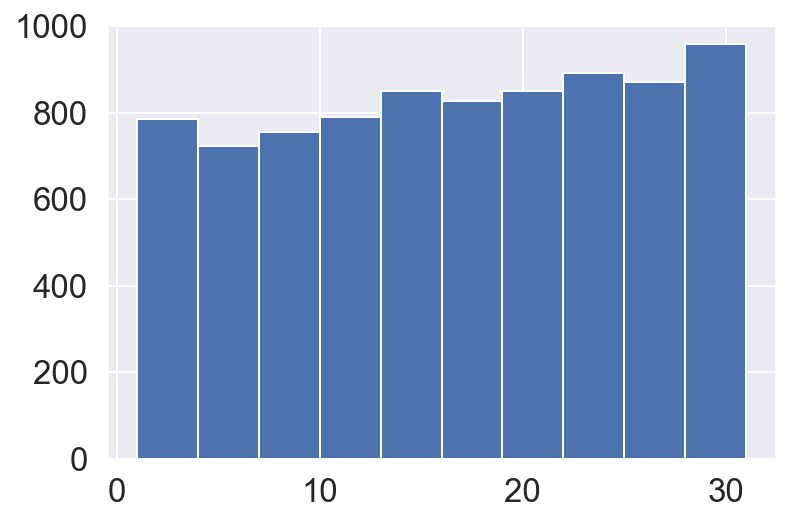

In [79]:
# count of the tweets by the day of the month
df.day.hist();

In [80]:
# changing the data type for the retweet count
df.retweet_count = df.retweet_count.astype(int)

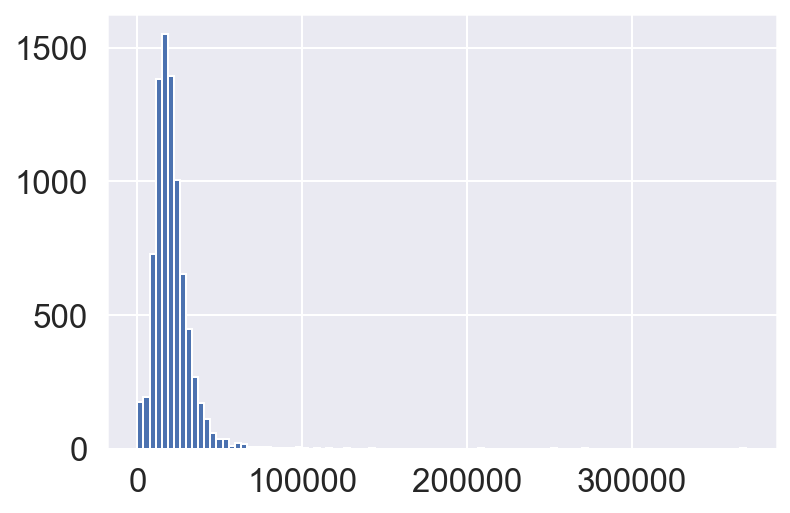

In [81]:
df.retweet_count.hist(bins = 100);

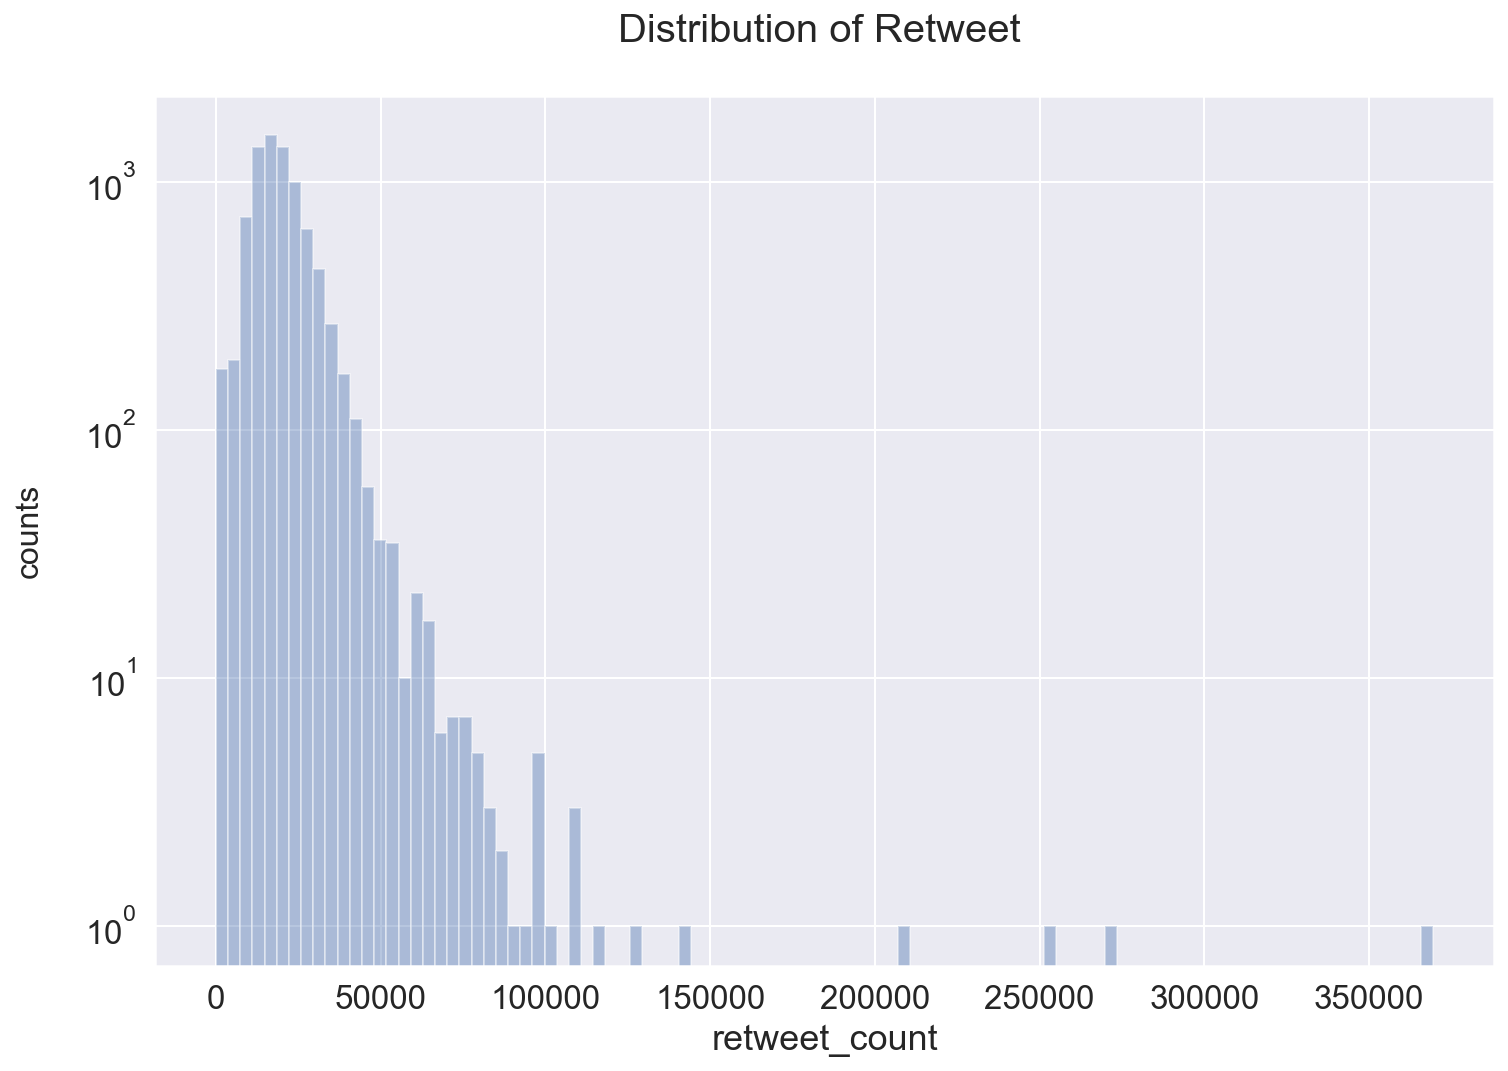

In [82]:

# looking at the retweet column


fig, ax = plt.subplots(figsize=(12, 8))

sns.distplot(df.retweet_count, bins=100, kde=False)
ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Distribution of Retweet \n', fontsize=20)
ax.set_yscale('log')
plt.show()

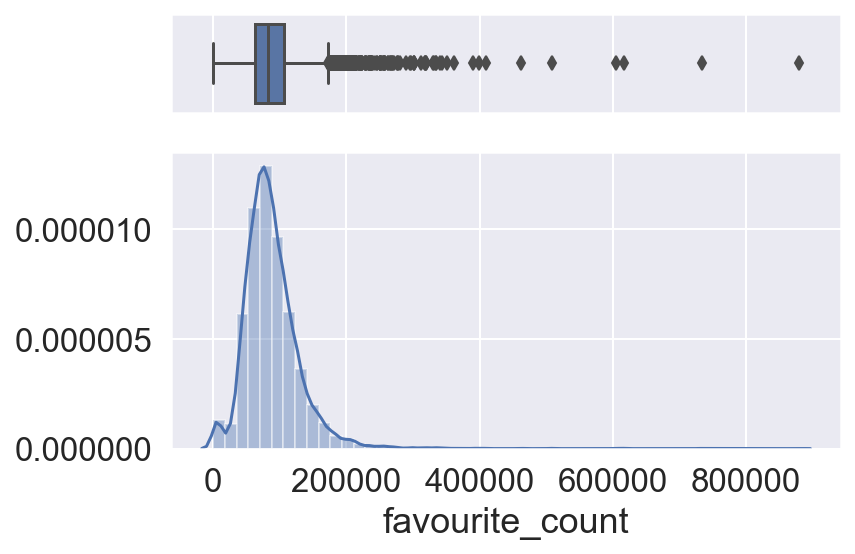

In [83]:
# Import library and dataset
import seaborn as sns
import matplotlib.pyplot as plt
#df = house
 
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
 
# Add a graph in each part
sns.boxplot(df["favourite_count"], ax=ax_box)
sns.distplot(df["favourite_count"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='');


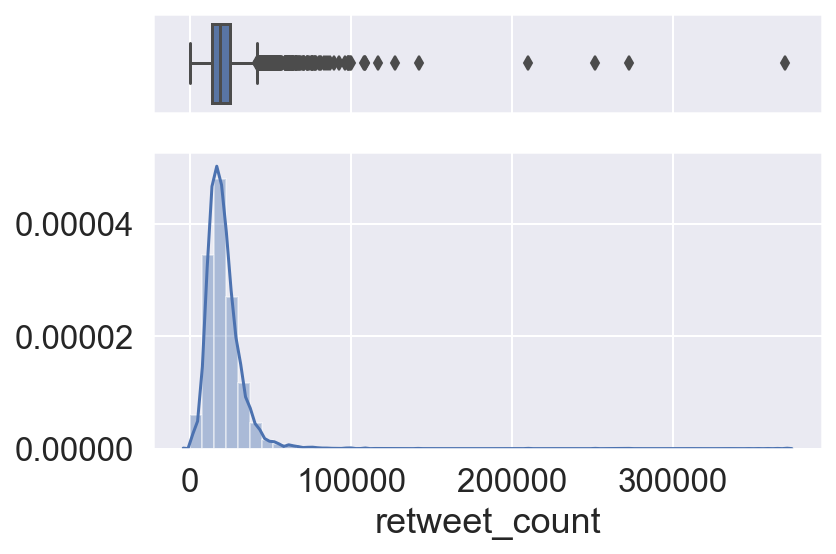

In [84]:
 
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
 
# Add a graph in each part
sns.boxplot(df["retweet_count"], ax=ax_box)
sns.distplot(df["retweet_count"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='');

# Removing Outliers

In [85]:
#def remove_outlier_std(df_in, col_name):
#    df_std = df_in[col_name].std()
#    df_mean = df_in[col_name].mean()
#    fence_low  = df_mean - (df_std * 3)
#    fence_high = df_mean + (df_std * 3)
#    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#    return df_out



In [86]:
#df = remove_outlier_std(df, 'favourite_count')

In [87]:
df.shape

(8305, 13)

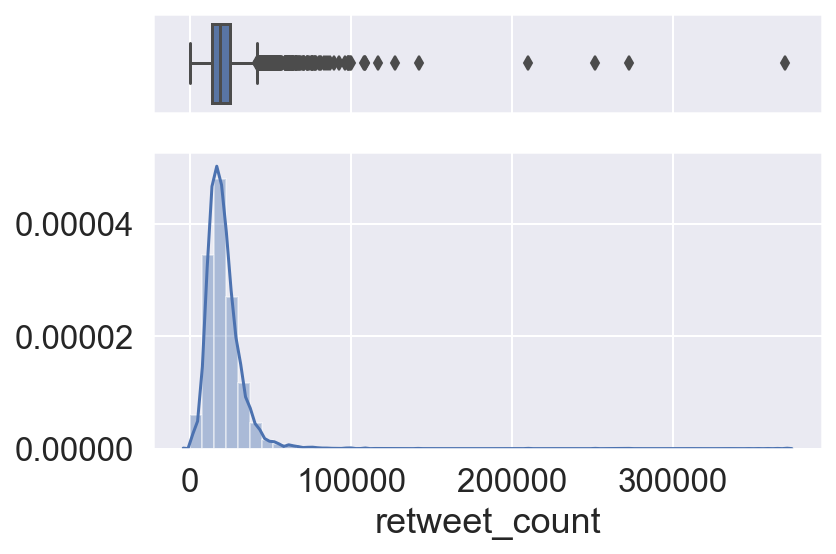

In [88]:
 
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
 
# Add a graph in each part
sns.boxplot(df["retweet_count"], ax=ax_box)
sns.distplot(df["retweet_count"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='');

# Mean for the likes in the Non - RTs - 88,253

In [89]:
df.groupby('is_retweet')[['favourite_count']].mean()

,favourite_count
is_retweet,
false,88253.716436


In [90]:
df.favourite_count.sum()

732947115

In [91]:
df.favourite_count.std()

42811.845277444794

In [92]:
df.retweet_count.sum()

171431537

In [93]:
df[df.is_retweet == 'false'].shape

(8305, 13)

In [94]:
df.head()

,source,tweet,created_at,retweet_count,favourite_count,is_retweet,id_str,date,time,day,year,weekday,weekday_txt
0,Twitter for iPhone,The Great State of North Carolina has EARLY VO...,2019-08-30 21:39:54,19127,60738,false,1167552549974675458,2019-08-30,1900-01-01 21:39:54,30,2019,4,Friday
1,Twitter for iPhone,https://t.co/ufd7tsGyAx,2019-08-30 20:00:31,9987,39490,false,1167527540518522883,2019-08-30,1900-01-01 20:00:31,30,2019,4,Friday
2,Twitter Media Studio,This should NEVER happen to another President ...,2019-08-30 19:12:50,18446,64046,false,1167515540199530499,2019-08-30,1900-01-01 19:12:50,30,2019,4,Friday
3,Twitter Media Studio,"""FALLOUT FROM IG'S SCATHING COMEY REPORT"" http...",2019-08-30 18:57:59,10543,35113,false,1167511801984114691,2019-08-30,1900-01-01 18:57:59,30,2019,4,Friday
4,Twitter Media Studio,“One of the most disgraceful examples of an ab...,2019-08-30 18:53:51,17935,53636,false,1167510759724765186,2019-08-30,1900-01-01 18:53:51,30,2019,4,Friday


In [95]:
df.favourite_count.sum()

732947115

In [96]:
#df.groupby('favourite_count')[['tweet']].count()
bins = pd.cut(df['favourite_count'], [0, 100, 250, 1500, 3000,4000,5000,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000])
df.groupby(bins)['favourite_count'].agg(['count', 'sum'])

,count,sum
favourite_count,,
"(0, 100]",17,485
"(100, 250]",4,730
"(250, 1500]",11,10898
"(1500, 3000]",22,48249
"(3000, 4000]",9,31609
"(4000, 5000]",14,62732
"(5000, 10000]",62,445680
"(10000, 20000]",59,798535
"(20000, 30000]",68,1771993


In [97]:
df.columns

Index(['source', 'tweet', 'created_at', 'retweet_count', 'favourite_count',
       'is_retweet', 'id_str', 'date', 'time', 'day', 'year', 'weekday',
       'weekday_txt'],
      dtype='object')

# DATA CLEANING 
## Links

In [98]:
 
# Getting rid of the links in the tweets


def get_words(x):

    temp_list = []
                                                                # getting the link and replacing the link within tweet
    pattern_link = re.compile(r'https?://[A-Za-z0-9./]+')
    words_str = re.sub(pattern_link, ' ', x)
                                                                # getting the words seperately
    pattern = re.compile(r'[A-Z]\w+')
    temp_list = re.findall(pattern,words_str)
                                                                # getting rid of the numbers
    for x in temp_list:
        if '1234567890' in x:
            temp_list.pop(x)
                                                                # joining the list returned by the regex
    result2_str = " ".join(temp_list)
 
    return words_str
    
    # PRE-CLEANING: 'RT @WhiteHouse: President Trump Signs H.R. 1327  '
    # POST-CLEANING: 'RT @WhiteHouse: President Trump Signs H.R. 1327 https://t.co/r1YBKEX3hY'

df['my_clean'] = df['tweet'].apply(get_words)

In [99]:
df.my_clean

0        The Great State of North Carolina has EARLY VO...
1                                                         
2        This should NEVER happen to another President ...
3              "FALLOUT FROM IG'S SCATHING COMEY REPORT"  
4        “One of the most disgraceful examples of an ab...
5                         Thanks @RepDougCollins - TRUE!  
6        The United States of America was not involved ...
9        If the Fed would cut we would have one of the ...
10       The Euro is dropping against the Dollar “like ...
11       ....We don’t have a Tariff problem (we are rei...
12                                                        
13       Bryan Dean Wright former CIA Officer(Dem): “In...
14       The fact that James Comey was not prosecuted f...
15       The disastrous IG Report on James Comey shows ...
19                                An idea liked by many?  
20       General Motors which was once the Giant of Det...
21                                                      

In [100]:
# getting rid of the symbols in the tweets
def getrid_symbols(x):
                                                                #  REGEX: getting rid of the ' " : . @ ! ?
    y = re.sub(r'[^\w\s]', '', x)
                                                                #  REGEX: getting rid of the numbers
    z = re.sub('\d+', '', y)
    #z = re.sub("^\d+\s|\s\d+\s|\s\d+", " ", y)
                                                                # REGEX: to remove the single small letters
    j = re.sub(r'\b[a-z]\b', '', z)
    k = re.sub(r'[0-9]', '', j)
    #k = re.sub(r'\b[A-Z]\b', '', z) ############ please include '@[\w]*' for @twitterhandles, _ツ_ how to del __
    m = re.sub(r'\s[a-z][a-z]\s', ' ', k)
    return m

df['clean'] = df['my_clean'].apply(getrid_symbols)

In [101]:
#df.clean

In [102]:
words = set(nltk.corpus.words.words())
# trying to remove the non sense words form the tweets, removes @userhandler, links etc
def clean_sent(sent):
    
     return " ".join(w for w in nltk.wordpunct_tokenize(sent) \
     if w.lower() in words or not w.isalpha())


df['my_clean'] = df['clean'].apply(clean_sent)

In [103]:
#df.my_clean

# ~ making a copy of the ORIGINAL DATAFRAME in df_tweet

In [104]:
# making a copy of the ORIGINAL DATAFRAME in df_tweet

df_tweet = df.copy()

# Dropping the extra Columns

In [105]:
df_tweet = df_tweet.drop(['source', 'created_at', 'is_retweet', 'id_str', 'date', 
               'time', 'day', 'year'], axis = 1)

In [106]:
#clean_tweets = []
#for tweet in tweets_list:
#    for word in tweet:
#        if '_' not in ascii(word):
#            clean_tweets.append(str(word))
#len(clean_tweets)

In [107]:
df_tweet.to_csv(r'trumptweetsclean1.csv')

In [108]:
df_tweet['split_col'] = df.my_clean.apply( lambda x: x.split())

# More cleaning, removing other language tweets 

In [109]:
#df_tweet['join_col'] = df_tweet.split_col.apply(lambda x: ','.join(x))

def check_ascii(x):
    if '_' not in ascii(x):
        return x
    else:
        return np.nan

In [110]:
df_tweet['col1']= df_tweet.split_col.map(check_ascii)

# Removing the Null Values

In [111]:
df_tweet.col1.isnull().sum()

79

In [112]:
df_tweet.shape

(8305, 9)

In [113]:
df_tweet.dropna(axis = 0, inplace = True)

In [114]:
df_tweet.shape

(8226, 9)

In [115]:
df_tweet.columns

Index(['tweet', 'retweet_count', 'favourite_count', 'weekday', 'weekday_txt',
       'my_clean', 'clean', 'split_col', 'col1'],
      dtype='object')

In [116]:
df_tweet.head()

,tweet,retweet_count,favourite_count,weekday,weekday_txt,my_clean,clean,split_col,col1
0,The Great State of North Carolina has EARLY VO...,19127,60738,4,Friday,The Great State North EARLY VOTING for very im...,The Great State North Carolina has EARLY VOTIN...,"[The, Great, State, North, EARLY, VOTING, for,...","[The, Great, State, North, EARLY, VOTING, for,..."
1,https://t.co/ufd7tsGyAx,9987,39490,4,Friday,,,[],[]
2,This should NEVER happen to another President ...,18446,64046,4,Friday,This should NEVER happen another President again,This should NEVER happen another President aga...,"[This, should, NEVER, happen, another, Preside...","[This, should, NEVER, happen, another, Preside..."
3,"""FALLOUT FROM IG'S SCATHING COMEY REPORT"" http...",10543,35113,4,Friday,FROM SCATHING REPORT,FALLOUT FROM IGS SCATHING COMEY REPORT,"[FROM, SCATHING, REPORT]","[FROM, SCATHING, REPORT]"
4,“One of the most disgraceful examples of an ab...,17935,53636,4,Friday,One the most disgraceful an abuse power govern...,One the most disgraceful examples an abuse pow...,"[One, the, most, disgraceful, an, abuse, power...","[One, the, most, disgraceful, an, abuse, power..."


# Stemming

In [117]:
stemmer = PorterStemmer()
df_tweet['tokenized'] = df_tweet.col1.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
df_tweet.tokenized.head(5)

0    [the, great, state, north, earli, vote, for, v...
1                                                   []
2    [thi, should, never, happen, anoth, presid, ag...
3                                [from, scath, report]
4    [one, the, most, disgrac, an, abus, power, gov...
Name: tokenized, dtype: object

In [118]:
def join_list(x):
    return " ".join(x)


df_tweet['tokenized'] = df_tweet.tokenized.map(join_list) # Joining the list into a string
df_tweet.tokenized

0        the great state north earli vote for veri impo...
1                                                         
2               thi should never happen anoth presid again
3                                        from scath report
4        one the most disgrac an abus power govern you ...
5                                               thank true
6        the unit wa not involv the catastroph accid du...
9        If the fed would cut would have one the bigges...
10       the drop against the dollar like crazi give th...
11       We dont have tariff problem are bad unfair hav...
12                                                        
13       dean wright former In had coup We have take an...
14       the fact that wa not for the absolut horribl d...
15       the disastr report the how unfairli I and mill...
19                                            An idea mani
20       gener which wa onc the giant now one the auto ...
21                                                      

# writing data to csv files

In [119]:
# writing data to csv files
df_tweet.to_csv(r'trumptweetsclean1.csv')
df.to_csv(r'alldata.csv')

# Removing the single letters

In [120]:
def check_size(x):
    my_list = []
    for y in x:
        if len(y) != 2:
            my_list.append(y)
    return my_list

In [121]:
df_tweet['col2']= df_tweet.col1.apply(check_size)
#df_tweet['tokenized'] = df_tweet.tokenized.apply(check_size)

In [122]:
df_tweet['join_col'] = df_tweet.col2.apply(lambda x: ' '.join(x))
#df_tweet['tokenized']=df_tweet.tokenized.apply(lambda x: ' '.join(x))

In [123]:
df_tweet.columns

Index(['tweet', 'retweet_count', 'favourite_count', 'weekday', 'weekday_txt',
       'my_clean', 'clean', 'split_col', 'col1', 'tokenized', 'col2',
       'join_col'],
      dtype='object')

In [124]:
df_tweet.drop(['tweet', 'my_clean', 'clean', 'split_col', 'col1',
       'col2'], axis = 1, inplace = True)

In [125]:
df_tweet.columns

Index(['retweet_count', 'favourite_count', 'weekday', 'weekday_txt',
       'tokenized', 'join_col'],
      dtype='object')

In [126]:
df_tweet.head()

,retweet_count,favourite_count,weekday,weekday_txt,tokenized,join_col
0,19127,60738,4,Friday,the great state north earli vote for veri impo...,The Great State North EARLY VOTING for very im...
1,9987,39490,4,Friday,,
2,18446,64046,4,Friday,thi should never happen anoth presid again,This should NEVER happen another President again
3,10543,35113,4,Friday,from scath report,FROM SCATHING REPORT
4,17935,53636,4,Friday,one the most disgrac an abus power govern you ...,One the most disgraceful abuse power governmen...


In [127]:
df_tweet.shape

(8226, 6)

In [128]:
df_tweet.join_col.isnull().sum()

0

In [129]:
df_tweet = df_tweet.reset_index()

In [130]:
df_tweet.drop('index', axis = 1, inplace = True)

In [131]:
mask = (df_tweet.favourite_count == 0)
df_tweet[mask].shape

(1, 6)

In [132]:
df_tweet = df_tweet[df_tweet.favourite_count != 0]

In [133]:
df_tweet.shape

(8225, 6)

# Writing to CSV

In [134]:
df_tweet.to_csv(r'trumptweetsclean1.csv')

In [135]:
#mask= (df_tweet.join_col == '')
#df_tweet = df_tweet[df_tweet.join_col !='']

In [136]:
df_tweet.shape

(8225, 6)

In [137]:
df_tweet['level'] = np.where(df_tweet['favourite_count'] < df_tweet.favourite_count.median(), 0, 1)

In [138]:
df_tweet.head()

,retweet_count,favourite_count,weekday,weekday_txt,tokenized,join_col,level
0,19127,60738,4,Friday,the great state north earli vote for veri impo...,The Great State North EARLY VOTING for very im...,0
1,9987,39490,4,Friday,,,0
2,18446,64046,4,Friday,thi should never happen anoth presid again,This should NEVER happen another President again,0
3,10543,35113,4,Friday,from scath report,FROM SCATHING REPORT,0
4,17935,53636,4,Friday,one the most disgrac an abus power govern you ...,One the most disgraceful abuse power governmen...,0


In [139]:
df_tweet.level.value_counts(normalize = True)

1    0.500061
0    0.499939
Name: level, dtype: float64

In [140]:
Xl = df_tweet['join_col']
yl = df_tweet.level

In [141]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, yl, test_size = 0.2, random_state = 1, stratify = yl)

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr_pipeline = Pipeline([
    ('vect', CountVectorizer(lowercase=True, strip_accents='unicode', stop_words=stop)),
    ('tfidf', TfidfTransformer()),
    ('lr' , LogisticRegression(solver='liblinear', multi_class='ovr'))])

NameError: name 'stop' is not defined

In [ ]:
lr_pipeline.fit(Xl_train, yl_train)
predicted = lr_pipeline.predict(Xl_test)
lr_pipeline.score(Xl_test, yl_test)

In [ ]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')

In [ ]:
tvec = TfidfVectorizer(stop_words = 'english', norm = 'l2', min_df = 2, max_features = 2000, ngram_range = (1,3))

In [ ]:
tvec.fit(Xl_train)
Xl_train = tvec.transform(Xl_train)
Xl_test = tvec.transform(Xl_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini',
                                    max_depth=None, 
                                    random_state=1)
classifier.fit(Xl_train, yl_train)
print("Train score: ", classifier.score(Xl_train, yl_train))
print("Train CV score: ", cross_val_score(classifier, Xl_train, yl_train, cv=5).mean())
print("Test score: ", classifier.score(Xl_test, yl_test))

In [ ]:
feature_importances = pd.DataFrame(classifier.feature_importances_,
                                   index=Xl.columns,
                                   columns=['importance'])

feature_importances.sort_values(by='importance', ascending=False)

In [ ]:
list(model.get_params().keys())

In [ ]:
params = {'C': np.logspace(-5, 5, 15),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}

In [ ]:
gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)
gs = GridSearchCV(estimator = model, param_grid = params, cv = 5)

In [ ]:
gs.fit(Xl_train, yl_train)

In [ ]:
gs_best = gs.best_estimator_
gs_best

In [ ]:
print(gs.best_score_)

In [ ]:
cross_val_score(gs.best_estimator_, Xl_train, yl_train, cv=5).mean()

In [ ]:
gs.score(Xl_train, yl_train)

In [ ]:
gs.score(Xl_test, yl_test)

In [ ]:
print(gs.best_params_)

In [ ]:
gs.predict(Xl_test)

In [ ]:
results = pd.DataFrame(gs.cv_results_)
results

In [ ]:
results[['mean_test_score'] +
        [col for col in results.columns if 'param_' in col]].head()

In [ ]:
grouped = results.groupby(['param_penalty', 'param_fit_intercept'])
groups = list(grouped.groups.keys())

for i in range(len(groups)):
    grouped.get_group(groups[i]).plot(
        x='param_C', y='mean_test_score', logx=True, lw=3, c='b', title='Penalty: {} , Intercept: {}'.format(groups[i][0], groups[i][1]));

In [ ]:
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", len(gs.classes_)))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions_train = gs.predict(Xl_train)
predictions_test = gs.predict(Xl_test)

In [ ]:
skplt.metrics.plot_confusion_matrix(yl_train, predictions_train, figsize=(6,6))
plt.ylim([-0.5, len(yl_train.unique())-0.5]);

In [ ]:
skplt.metrics.plot_confusion_matrix(yl_test, predictions_test)
plt.ylim([-0.5, len(yl_test.unique())-0.5])
plt.show()

In [ ]:
print(classification_report(yl_train, predictions_train))

In [ ]:
predictions_train

In [ ]:
print(classification_report(yl_test, predictions_test))

In [ ]:
probabilities_train = gs.predict_proba(Xl_train)
probabilities_test = gs.predict_proba(Xl_test)

In [ ]:
skplt.metrics.plot_precision_recall(yl_train, probabilities_train, cmap=cmap)
plt.show()

In [ ]:
skplt.metrics.plot_roc(yl_train, probabilities_train, cmap=cmap)
plt.show()

In [ ]:
df_tweet.to_csv(r'trumptweetsclean1.csv')

In [ ]:
# Assiging the Predictors Matrix and the Preticting Series
X = df_tweet['join_col']
y = df_tweet.favourite_count

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
my_pipeline = Pipeline([
    ('vect', CountVectorizer(lowercase=True, strip_accents='unicode', stop_words=stop)),
    ('tfidf', TfidfTransformer()),
    ('nnet' , MLPRegressor(hidden_layer_sizes=1, solver='lbfgs',
                    activation='identity', max_iter=1000, random_state=1))])

In [ ]:
my_pipeline.fit(X_train, y_train)
predicted = my_pipeline.predict(X_test)
my_pipeline.score(X_test, y_test)

In [ ]:

#for x in ['abc1', 'abc']:
#    if '1' in str(x):
#        print('yes')

In [ ]:
# Using Count Vectorizer

cvt = CountVectorizer(strip_accents='unicode', stop_words = 'english')
cvt_fit = cvt.fit_transform(X_train, y_train)
feature_names = cvt.get_feature_names()
count_df = np.sum(cvt_fit, axis = 0)

count_df = pd.DataFrame(count_df, columns = feature_names)
count_df= count_df.T
count_df.rename(columns={0: 'word_count'}, inplace=True)
count_df.sort_values(by = 'word_count', ascending = False).head(100)

In [ ]:
count_df.shape

In [ ]:
def stem(tokens):
    '''rule-based stemming of a bunch of tokens'''

    new_bag = []
    for token in tokens:
        # define rules here
        if token.endswith('s'):
            new_bag.append(token[:-1])
        elif token.endswith('er'):
            new_bag.append(token[:-2])
        elif token.endswith('ce'):
            new_bag.append(token[:-2])
        elif token.endswith('tion'):
            new_bag.append(token[:-4])
        elif token.endswith('tist'):
            new_bag.append(token[:-4])
        elif token.endswith('ing'):
            new_bag.append(token[:-3])
        else:
            new_bag.append(token)

    return new_bag


#def get_stems(x):
#    stemmer = PorterStemmer()
#    return stemmer.stem(y)
    #return my_list


In [ ]:
#df_tweet.join_col.map(lambda x: [stemmer.stem(i) for i in x]).head() # stemming

In [ ]:
#df_tweet.drop('col5', axis = 1, inplace = True)

In [ ]:
#df_tweet.join_col.replace(',', ' ') # stemming

In [ ]:



#df_tweet.join_col.map(get_stems)
#for x in ['Senator','GREAT','JOB','for','the','and','fully','our']:
#    print(x)

In [ ]:
mask = (count_df.word_count == 1)
words_df = count_df[count_df.word_count > 1]

In [ ]:
df_for_model = pd.DataFrame(words_df, columns = words_df.columns)
df_for_model

In [ ]:
all_words = ' '.join([text for text in df_tweet['join_col']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# delete the tweets in another language
# delete the tweets with two letters in it
# delete the tweets

In [ ]:
#len(count_final.columns)

In [ ]:
#str(count_t.sort_values(by = 'word_count', ascending = True).index[0])

In [ ]:
#len([ascii(word) for word in feature_names if '_' not in word])#ascii('_ツ_')

In [ ]:
#col_list = [ascii(word) for word in feature_names if '_' not in word]

In [ ]:
#col_list = [x for x in col_list if len(x) > 5]

In [ ]:
#g1 = [i.replace("'", "") for i in col_list]

# First Score with the Linear Regression, TfidfTransformer(), CountVectorizer()

In [ ]:

stop = stopwords.words('english')
stop += ['http', 'https', 'rt',]
 
# Score run Monday 02 Dec: -1.57

# MultinomialNB
pipeline = Pipeline([
    ('vect', CountVectorizer(lowercase=True, strip_accents='unicode', stop_words=stop)),
    ('tfidf', TfidfTransformer()),
    ('lr', LinearRegression())

])
pipeline.fit(X_train, y_train)
predicted0 = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

# Getting the residuals and plotting them

In [ ]:
residuals0=pd.DataFrame(y_test - predicted0) 

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(predicted0, y_test, s=30, marker='o', zorder=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='k', lw=2)
plt.xlabel("Predicted Tweet Likes - $\hat{y}$")
plt.ylabel("Actual Tweet Likes - y")
plt.show()

In [ ]:
plt.hist(residuals0["favourite_count"], bins =100)
plt.xticks(rotation=45)
plt.show()

In [ ]:
predicted0.mean()

In [ ]:
tvec = TfidfVectorizer(stop_words='english') # if we put norm = none, it doesnt normalize
tvec.fit(X_train, y_train)
counter = tvec.transform(X_train, y_train)
counter

In [ ]:
feature_names = tvec.get_feature_names()

In [ ]:
count_all = np.sum(counter, axis = 0)
count_all

In [ ]:
#count_all = pd.DataFrame(counter, columns = feature_names)
#count_t= count_all.T
#count_t.rename(columns={0: 'word_count'}, inplace=True)

In [ ]:
df_tweet.favourite_count.mean()

# First score with Tfidf Transformer, Lasso and  CountVectorizer()

In [ ]:
# score on Monday 02 December, 2019 : -1.4178

#pipeline2 = Pipeline([
#    ('vect', CountVectorizer(lowercase=True, strip_accents='unicode', stop_words='english')),
#    ('tfidf', TfidfTransformer()),
#    ('lasso', Lasso(alpha = 0.05, max_iter = 10000))


#pipeline2.fit(X_train, y_train)
#predicted = pipeline2.predict(X_test)
#pipeline2.score(X_test, y_test)

# Second Score with Tfidf Transformer, Lasso and CountVectorizer()

In [ ]:
# Score on Monday 02 December, 2019 : 0.19609, 0.0722

# Score on Minday 03 December, 2019 0.16264
pipeline2 = Pipeline([
    ('vect', CountVectorizer(lowercase=True, strip_accents='unicode', stop_words = 'english')),
    ('tfidf', TfidfTransformer()),
    ('lasso', Lasso(alpha =19, max_iter = 1000000))

])
pipeline2.fit(X_train, y_train)
predicted = pipeline2.predict(X_test)
pipeline2.score(X_test, y_test)

In [ ]:
pipeline2.get_params()

# Scores with TfidfVectorizer, TfidfTransformer and Lasso... a little worse off

In [ ]:
# score down from 0.218 to 0.068 to 0.0590, to 0.12

pipeline3 = Pipeline([
    ('tvec' , TfidfVectorizer(stop_words='english', norm='l2')),
    ('tfidf', TfidfTransformer()),
    ('lasso', Lasso(alpha = 15, max_iter = 10000))

])
pipeline3.fit(X_train, y_train)
predicted = pipeline3.predict(X_test)
pipeline3.score(X_test, y_test)

In [ ]:
# Tweaking the Parameters for Tfidf score for range(1,6): 214758 | range(1,5): 0.2166869  | range(1,4): 0.215024

In [ ]:
# score down to 0.1945 to 0.049 to 0.10


pipeline3 = Pipeline([
    ('tvec' , TfidfVectorizer(stop_words='english', norm='l2', ngram_range = (1,4), min_df = 2)),
    ('tfidf', TfidfTransformer()),
    ('lasso', Lasso(alpha = 15, max_iter = 10000, warm_start = True))

])
pipeline3.fit(X_train, y_train)
predicted = pipeline3.predict(X_test)
pipeline3.score(X_test, y_test)

In [ ]:
pipeline3.steps[2][1].coef_

In [ ]:
pipeline3.steps[0][1].get_feature_names()

In [ ]:
df_coef=pd.DataFrame(zip(pipeline3.steps[0][1].get_feature_names(), pipeline3.steps[2][1].coef_),\
             columns = ['words', 'coefficients']).sort_values(by = 'coefficients',ascending = False)

df_coef['coef_abs'] = df_coef.coefficients.abs()

df_coef

In [ ]:
#df_coef.plot(kind = 'hbar', y = 'coef_abs');

In [ ]:
df_coef_less=pd.DataFrame(zip(pipeline3.steps[0][1].get_feature_names(), pipeline3.steps[2][1].coef_),\
             columns = ['words', 'coefficients']).sort_values(by = 'coefficients',ascending = True)

df_coef_less['coef_abs'] = df_coef.coefficients.abs()

df_coef_less.sort_values(by = 'coef_abs',ascending = True).head()

In [ ]:
stop_df = df_coef_less[df_coef_less.coef_abs <= 1]
stop_df.shape

In [ ]:
stop_df.reset_index(drop= True, inplace = True)
stop_df

In [ ]:
CountVectorizer()

In [ ]:
# Improving the pipeline with stop words from co-ef < 1

In [ ]:
pipeline11 = Pipeline([
    ('tvec' , TfidfVectorizer(stop_words='english', norm='l2', ngram_range = (1,4))),
    ('tfidf', TfidfTransformer()),
    ('elasticnet', ElasticNet(alpha = 100, max_iter = 10000))

])
pipeline3.fit(X_train, y_train)
predicted = pipeline3.predict(X_test)
pipeline3.score(X_test, y_test)

In [ ]:
stop_list = []

In [ ]:
pipeline12 = Pipeline([
    ('tvec' , TfidfVectorizer(stop_words='english', norm='l2', ngram_range = (1,4))),
    ('tfidf', TfidfTransformer()),
    ('lasso', Lasso(alpha = 19, max_iter = 10000))

])
pipeline3.fit(X_train, y_train)
predicted = pipeline3.predict(X_test)
pipeline3.score(X_test, y_test)

In [ ]:
df_tweet['log_fav'] = np.log1p(df_tweet.favourite_count)

In [ ]:
X = df_tweet['join_col']
ylog = df_tweet.log_fav

In [ ]:
X_train, X_test, ylog_train, ylog_test = train_test_split(X, ylog, test_size = 0.2)

In [ ]:
pipeline21 = Pipeline([
    ('tvec' , TfidfVectorizer(stop_words='english', norm='l2')),
    ('tfidf', TfidfTransformer()),
    ('lasso', Lasso(alpha = 19, max_iter = 10000))

])
pipeline21.fit(X_train, ylog_train)
predicted = pipeline21.predict(X_test)
pipeline21.score(X_test, ylog_test)


In [ ]:
(np.exp(predicted) - 1).mean()

In [ ]:
pipeline21

In [ ]:
pipeline[0]

In [ ]:
X_tweet = df_tweet['join_col']
y_tweet = df_tweet['retweet_count']

In [ ]:
X_tweet_train, X_tweet_test, y_tweet_train, y_tweet_test = train_test_split(X_tweet, y_tweet, test_size = 0.2)

In [ ]:
pipeline_tweet = Pipeline([
    ('tvec' , TfidfVectorizer(stop_words='english', norm='l2')),
    ('tfidf', TfidfTransformer()),
    ('lassp', Lasso(alpha = 5, max_iter = 10000))

])
pipeline_tweet.fit(X_tweet_train, y_tweet_train)
predicted_tweet = pipeline_tweet.predict(X_tweet_test)
pipeline_tweet.score(X_tweet_test, y_tweet_test)

In [ ]:
#from sklearn.decomposition import PCA

pca = PCA(n_components=1000)
pca.fit(df_tweet)

In [ ]:
X_t = df_tweet['tokenized']
y = df_tweet.favourite_count

In [ ]:
X_t_train, X_t_test, y_train, y_test = train_test_split(X_t, y, test_size = 0.2, random_state = 1)

In [ ]:
# Using Count Vectorizer

cvt = CountVectorizer(strip_accents='unicode', stop_words = stop)
cvt_df = cvt.fit_transform(X_t_train, y_train)
feature_names = cvt.get_feature_names()
sum_count = np.sum(cvt_df, axis = 0)

word_count_df = pd.DataFrame(sum_count, columns = feature_names)
word_count_df = word_count_df.T
word_count_df.rename(columns={0: 'word_count'}, inplace=True)
word_count_df.sort_values(by = 'word_count', ascending = False).head(100)

In [ ]:
word_count_df.shape

In [ ]:
# Score on Monday 02 December, 2019 : 0.19609, 0.0722

# Score on Minday 03 December, 2019 0.16264
pipeline2 = Pipeline([
    ('vect', CountVectorizer(lowercase=True, strip_accents='unicode', stop_words = 'english')),
    ('tfidf', TfidfTransformer()),
    ('lasso', Lasso(alpha =19, max_iter = 1000000))

])
pipeline2.fit(X_t_train, y_train)
predicted = pipeline2.predict(X_t_test)
pipeline2.score(X_t_test, y_test)

In [ ]:
CountVectorizer()

In [ ]:
# score down from 0.218 to 0.068 to 0.0590, to 0.12

pipeline3 = Pipeline([
    ('tvec' , TfidfVectorizer(stop_words='english', norm='l2', min_df=2, max_features = 2000, ngram_range=(1,3))),
    ('tfidf', TfidfTransformer()),
    ('lasso', Lasso(alpha = 19, max_iter = 10000))

])
pipeline3.fit(X_t_train, y_train)
predicted = pipeline3.predict(X_t_test)
pipeline3.score(X_t_test, y_test)

In [ ]:
TfidfVectorizer(stop_words = 'english', norm = 'l1')

In [ ]:
# score down from 0.218 to 0.068 to 0.0590, to 0.12

pipeline3 = Pipeline([
    ('tvec' , TfidfVectorizer(stop_words='english', norm='l2', min_df=2, max_features = 2000, ngram_range=(1,3))),
    ('scaler', StandardScaler(with_mean = False)),
    ('lasso', Lasso(alpha = 19, max_iter = 10000))

])
pipeline3.fit(X_t_train, y_train)
predicted = pipeline3.predict(X_t_test)
pipeline3.score(X_t_test, y_test)

In [ ]:
tvec = TfidfVectorizer(stop_words = 'english', norm = 'l2', min_df = 2, max_features = 2000, ngram_range = (1,3))

In [ ]:
tvec.fit(X_train)


In [ ]:
X_train = tvec.transform(X_train)

In [ ]:
X_test = tvec.transform(X_test)

In [ ]:
 
np.reshape('favourite_count', (-1,1))

In [192]:
pt = PowerTransformer()
y_train = pt.fit_transform(np.reshape(y_train.values, (-1,1)))
y_test = pt.fit_transform(np.reshape(y_test.values, (-1,1)))

In [191]:
# Do not Run after this point. Taking ages to finish :(

In [192]:
lasso_cv = LassoCV(alphas = np.logspace(-5,5, 100), cv = 5)
lasso_cv.fit(X_train, np.ravel(y_train))
print(lasso_cv.alpha_)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.308760986730249, tolerance: 0.5252308615144795
  max_iter, tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7274823779198414, tolerance: 0.5251640875477503
  max_iter, tol, rng, random, positive)


0.0013219411484660286


In [193]:
lasso_cv = LassoCV(alphas = np.logspace(4,20,100), cv = 5)
lasso_cv.fit(X_train, np.ravel(y_train))
print(lasso_cv.alpha_)

1e+20


In [194]:
lasso =Lasso(alpha = 19, max_iter = 10000)

In [195]:
lasso.fit(X_train, y_train)

Lasso(alpha=19, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [196]:
regressor = DecisionTreeRegressor(criterion='mse', max_depth=5,random_state=1)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [197]:
print("Train score: ", regressor.score(X_train, y_train))
print("Train CV score: ", cross_val_score(regressor, X_train, y_train, cv=5).mean())
print("Test score: ", regressor.score(X_test, y_test))

Train score:  0.036805024946652165
Train CV score:  -0.017633111939734956
Test score:  -0.06533507732428112


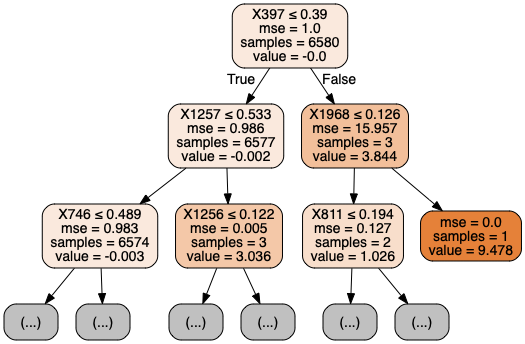

In [198]:
dot_data = StringIO()
export_graphviz(regressor,
                out_file=dot_data,
                max_depth=2,
                filled=True,
                rounded=True,
                special_characters=True
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [199]:
nnet = MLPRegressor(hidden_layer_sizes=1, solver='lbfgs',
                    activation='identity', max_iter=1000, random_state=1)
nnet.fit(X_train, y_train)
metrics.mean_squared_error(y_test, nnet.predict(X_test))

//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.3691529552825867

In [200]:
nnet.score(X_test, y_test)

-0.36915295528258674

In [206]:
base_estimator = DecisionTreeRegressor(max_depth=2)
model = AdaBoostRegressor(base_estimator=base_estimator,
                          n_estimators=100,
                          random_state=1)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(cross_val_score(model, X_train, y_train, cv=5).mean())
print(model.score(X_test, y_test))

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.016756239162212028


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

-0.004529307642702163
-0.0034128410523202035
